In [251]:
import numpy as np
from sklearn.datasets import make_classification,make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
def gen_data(type=0):
    if type==0:
        X,y=make_circles(n_samples=1000,noise=0.1,factor=0)
    else:
        X,y=make_classification(n_samples=1000,n_informative=2,n_features=2)
    return X,y

In [114]:
X,y=gen_data(0)

In [244]:
def filter_labels(X,y,g):
    y_c=np.copy(y)
    y_len=len(y_c)
    y_positive=np.argwhere(y_c==1)
    y_negative=np.argwhere(y_c==0)
    pos_len=len(y_positive)
    neg_len=len(y_negative)
    neg_idx=np.random.choice(neg_len,g,replace=False)
    pos_idx=np.random.choice(pos_len,g,replace=False)
    sum_idx= np.concatenate((y_positive[pos_idx],y_negative[neg_idx]))
    idx=np.delete(np.arange(y_len),sum_idx)
    y_c[idx]=y_c[idx]*0-1
    return X,y_c

In [246]:
X,y=gen_data(0)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_semi,y_semi=filter_labels(X_train,y_train,200)

In [247]:
np.random.choice(np.arange(10),8,replace=False)

array([8, 0, 3, 2, 1, 9, 6, 5])

In [248]:
from sklearn.semi_supervised import LabelPropagation,LabelSpreading,SelfTrainingClassifier
class semi_supervised_svm:
    def __init__(self,gamma=0.1,C=1):
        self.gamma=gamma
        self.C=C
        self.clf=SVC(probability=True,kernel='rbf',gamma=self.gamma,C=self.C)
    def set_clf(self):
        self.clf=SVC(probability=True,kernel='rbf',gamma=self.gamma,C=self.C)
    def fit_naive(self,X,y):
        idx= np.argwhere(y!=-1)
        X_semi,y_semi = X[idx.flatten()], y[idx.flatten()]
        self.clf.fit(X_semi,y_semi)
    def fit_self_training(self,X,y):
        st_clf=SelfTrainingClassifier(self.clf)
        st_clf.fit(X,y)
        self.clf= st_clf.estimator_
        
    def fit_label_propagation(self,X,y):
        lp_clf=LabelPropagation()
        lp_clf.fit(X,y)
        self.clf.fit(X,lp_clf.transduction_)
        
    def fit_label_spreading(self,X,y):
        ls_clf=LabelSpreading()
        ls_clf.fit(X,y)
        self.clf.fit(X,ls_clf.transduction_)
    def predict(self,X):
        return self.clf.predict(X)
    
    def score(self,X,y):
        return accuracy_score(y,self.predict(X))
    def get_methods(self):
        return ['naive','self_training','label_propagation','label_spreading']

In [256]:
def compare_for_g():
    g_list=[1,5,10,50,100,150,200]
    res={}
    clf=semi_supervised_svm()
    for m in clf.get_methods():
        res[m]=np.array([])
    for g in g_list:
        X,y=gen_data(0)
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
        X_semi,y_semi=filter_labels(X_train,y_train,g)
        for m in clf.get_methods():
            clf.set_clf()
            getattr(clf,'fit_'+m)(X_semi,y_semi)
            y_pred=clf.predict(X_test)
            acc=accuracy_score(y_test,y_pred)
            res[m]=np.append(res[m],acc)
    plt.figure(figsize=(10, 6))
    for m in clf.get_methods():
        plt.plot(g_list, res[m], label=m)
    plt.xlabel('Number of labeled samples (g)')
    plt.ylabel('Accuracy')
    plt.title('Semi-supervised SVM Accuracy vs Number of Labeled Samples')
    plt.legend()
    plt.show()
        
        

C:\Users\18pep\Documents\sem_I\AML\labs\.venv\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:324: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(
C:\Users\18pep\Documents\sem_I\AML\labs\.venv\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:324: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


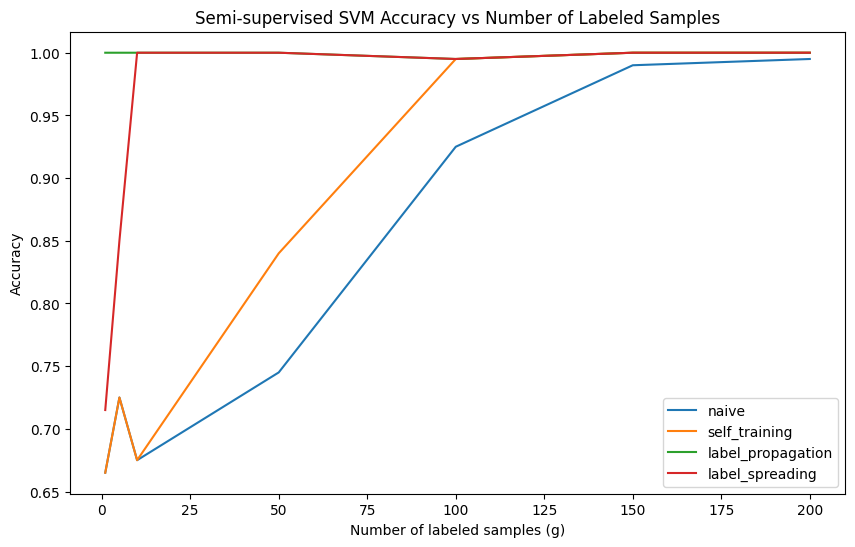

In [257]:
compare_for_g()